<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Comparing-t-tests-and-Chi-Square-Tests" data-toc-modified-id="Comparing-t-tests-and-Chi-Square-Tests-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Comparing t-tests and Chi-Square Tests</a></span><ul class="toc-item"><li><span><a href="#t-test-Referesher" data-toc-modified-id="t-test-Referesher-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>t-test Referesher</a></span></li></ul></li><li><span><a href="#Chi-Square-Text-Introduction" data-toc-modified-id="Chi-Square-Text-Introduction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Chi-Square Text Introduction</a></span></li></ul></div>

## Introduction
In this lesson you'll learn about another type of hypothesis test: the chi-square test! Also written as 
$χ^2$
 test or chi-squared test, this test is used for making claims about the frequencies of categorical data. Because it is testing frequencies rather than population parameters, this test is known as a non-parametric test.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Comparing t-tests and Chi-Square Tests

We'll introduce the chi-square test by comparing and contrasting it with a familiar statistical test: the t-test!

### t-test Referesher 
The t-test is applicable for continuous variables that can be represented by a probability density function (PDF), which allows us to understand the data in terms of parameters such as the mean and variance. There are several different kinds of t-tests depending on the question being asked, although we have mainly focused on one-sample and two-sample (independent) tests.

For example, we might do a one-sample, two-tailed t-test if we have the following (made up) sample of data, and we are trying to determine whether the mean of this data is significantly different from a 
$μ_0$
 of 21.

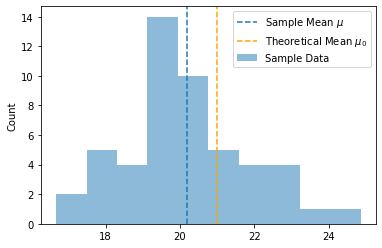

In [2]:
# Generate sample data as a normal continuous random variable
sample_data = stats.norm.rvs(loc=20, scale=2, size=50, random_state=5)

# Plot data as well as theoretical mean of 21
fig, ax = plt.subplots()
ax.hist(sample_data, alpha=0.5, label="Sample Data")
ax.axvline(sample_data.mean(), linestyle="--", label=r"Sample Mean $\mu$")
ax.axvline(21, linestyle="--", color="orange", label=r"Theoretical Mean $\mu_{0}$")
ax.set_ylabel("Count")
ax.legend();

Recall that the t-test:

- Has null and alternative hypotheses about the mean(s) of one or two samples. For the example shown above, the alternative hypothesis is $\mu ≠ \mu_{0}$ (i.e. $\mu ≠ 21$)
- Involves the calculation of a t-statistic (or t-value) that represents a standardized version of the difference between the two means, utilizing the sample variance as well as the number in the sample to perform this standardization
- Compares this t-statistic to the t-distribution (a bell-curve-shaped distribution) in order to determine whether we can reject the null hypothesis at a given alpha level — i.e. to determine whether the difference between the data and the theoretical expectation is statistically significant

The simplest way to execute a t-test is like this, using scipy.stats. We pass in the data plotted above, and use the hypotheses $H_{0}: \mu = \mu_{0}$ and $H_{a}:\mu ≠ \mu_{0}$ as well as $\alpha = 0.01$ to come to a conclusion. 


In [3]:
stats.ttest_1samp(sample_data, 21)

Ttest_1sampResult(statistic=-3.335711380689097, pvalue=0.001628519936938842)

Based on the results above (two-sided, since our alternative hypothesis is $\mu ≠ \mu_{0}$
 we can reject the null hypothesis at an alpha of 0.01, since the resulting p-value (0.0016) is less than our alpha. Therefore we can say that the difference between the sample mean and 21 is statistically significant at the 0.01 significance level.

(If you look closely at the code generating the sample, it was generated using a `loc` (mean) of 20 and a fairly small `scale` (variance), so it it makes sense that we got this result!)

## Chi-Square Text Introduction 

The chi-square ($\chi^2$) test is applicable for discrete variables that can be represented by a probability mass function, which allows us to understand the data in terms of the frequencies of each outcome. There are several different kinds of chi-square tests depending on the question being asked, but we'll focus on Pearson's chi-square test and how it is applied for goodness of fit, independence, and homogeneity.

Let's start with a goodness of fit example. This is kind of like the one-sample t-test shown above, in that we are comparing sample data to a theoretical value. This time instead of comparing the sample mean to a theoretical mean, we will compare the frequencies of observed data to the expected frequencies.

**Fair Coin**
For this example, let's use the coin toss at the Super Bowl (data through Super Bowl 55). We expect that this is a "fair" coin, meaning that we would expect it to produce Heads and Tails equally often.

In [4]:
# Data from sportsbettingdime.com
sb_data = pd.read_csv("superbowl.csv")
sb_data.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'superbowl.csv'